In [2]:
from pylab import *
import random_idx
from __future__ import division
import scipy
import time

%matplotlib inline

plt.rcParams.update({'axes.titlesize': 'xx-large'})
plt.rcParams.update({'axes.labelsize': 'xx-large'})
plt.rcParams.update({'xtick.labelsize': 'x-large', 'ytick.labelsize': 'x-large'})
plt.rcParams.update({'legend.fontsize': 'x-large'})


height has been deprecated.

2016-08-27 10:21


In [3]:
import scipy
def ncdf(z):
    return 0.5 * (1 + scipy.special.erf(z/2**0.5))

def p_correct_decay(M,ll=1, N=10000, D=27, ares=2000):
    M = np.array(M)
    p = np.zeros((ares-1, len(M)))
    
    dM = (1 / (1 - ll**2))
    
    for iM,Mval in enumerate(M):
        avals = np.linspace(N * ll ** Mval - 8 * (N*dM)**0.5, N * ll ** Mval + 8 * (N*dM)**0.5, ares)
        
        p[:, iM] = ncdf((avals[1:]-N * ll ** Mval) / ((dM)*N)**0.5) - ncdf((avals[:-1]-N * ll ** Mval) / ((dM)*N)**0.5)
        p[:, iM] *= (ncdf(np.mean(np.vstack((avals[1:], avals[:-1])), axis=0)/(dM*N)**0.5)) ** (D-1)

    return np.sum(p, axis=0)

## Sparsity

The first way we are going to test sparsity is by defining a "sparsity factor", which is simply the probability that one of the elements of the basis vectors is replaced by 0. We will then adjust this sparsity factor and then compute the capacity using the letter sequence task.

In [40]:
def test_capacity_sparsity(N, D, K=5, sf=0.1, trials=5e3):
    '''
    Runs a capacity experiment with sparsity in the basis vectors
    '''
    
    letter_vectors = 2 * (np.random.randn(D, N) > 0) - 1
    
    # sparsity is just replacing +1/-1 with zero randomly
    make_sparse = np.random.rand(D,N) < sf
    
    letter_vectors[make_sparse] = 0
    
    hypercapacity = np.zeros(N)

    tstart = time.time()
    lidx = np.zeros(trials)
    lidx[0] = np.random.randint(D)
    hypercapacity = letter_vectors[lidx[0], :]

    lidx_last_input = np.zeros(trials)
    lidx_input_K = np.zeros(trials)
    lidx_first_input = np.zeros(trials)
    
    for i in range(int(trials)-1):
        
        lidx[i+1] = np.random.randint(D)
        
        hypercapacity = np.roll(hypercapacity, 1) + letter_vectors[lidx[i+1], :]

        v_last_input = np.roll(hypercapacity, -1)
        v_input_K = np.roll(hypercapacity, -K) # we can still do this less than K, it will just be noise
        v_first_input = np.roll(hypercapacity, -(i+1))

        lidx_last_input[i] = argmax(np.dot(letter_vectors, v_last_input.T))
        lidx_input_K[i] = argmax(np.dot(letter_vectors, v_input_K.T))
        lidx_first_input[i] = argmax(np.dot(letter_vectors, v_first_input.T))

    print 'Duration: ', time.time() - tstart
    
    return lidx, lidx_last_input, lidx_input_K, lidx_first_input

[[ 0  0  0 ...,  0 -1  0]
 [ 0  0  0 ...,  0  0  0]
 [ 0  0  0 ...,  0  0  0]
 ..., 
 [ 0  0  0 ..., -1  1  1]
 [ 0  0  0 ...,  0  0  0]
 [ 0  0  0 ...,  0 -1  0]]


/home/epaxon/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:17: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/epaxon/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:19: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/epaxon/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:21: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/epaxon/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:22: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/epaxon/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:23: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/epaxon/anaconda2/lib/python2.7/site-pac

Duration:  8.85239505768


(array([ 12.,  11.,   3., ...,   3.,  23.,   1.]),
 array([ 12.,  11.,   3., ...,   3.,  23.,   0.]),
 array([ 12.,  19.,  14., ...,   1.,  21.,   0.]),
 array([ 12.,  12.,  12., ...,  12.,  12.,   0.]))

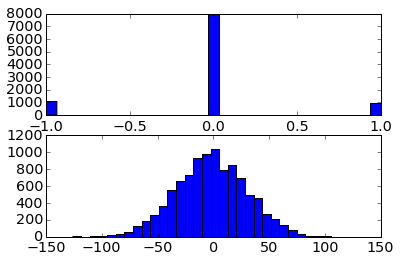

In [57]:
def test_capacity_sparsity_plot(N, D, K=5, sf=0.1, trials=5e3):
    '''
    Runs a capacity experiment with sparsity in the basis vectors
    '''
    
    letter_vectors = 2 * (np.random.randn(D, N) > 0) - 1
    
    # sparsity is just replacing +1/-1 with zero randomly
    make_sparse = np.random.rand(D,N) < sf 
    letter_vectors[make_sparse] = 0
    
    print letter_vectors
    
    hypercapacity = np.zeros(N)

    tstart = time.time()
    lidx = np.zeros(trials)
    lidx[0] = np.random.randint(D)
    hypercapacity += letter_vectors[lidx[0], :]

    lidx_last_input = np.zeros(trials)
    lidx_input_K = np.zeros(trials)
    lidx_first_input = np.zeros(trials)
    
    subplot(211)
    hist(hypercapacity, 31)
    #plot(hypercapacity)
    #print hypercapacity
    
    for i in range(int(trials)-1):
        
        lidx[i+1] = np.random.randint(D)
        hypercapacity = np.roll(hypercapacity, 1) + letter_vectors[lidx[i+1], :]

        v_last_input = np.roll(hypercapacity, -1)
        v_input_K = np.roll(hypercapacity, -K) # we can still do this less than K, it will just be noise
        v_first_input = np.roll(hypercapacity, -(i+1))

        lidx_last_input[i] = argmax(np.dot(letter_vectors, v_last_input.T))
        lidx_input_K[i] = argmax(np.dot(letter_vectors, v_input_K.T))
        lidx_first_input[i] = argmax(np.dot(letter_vectors, v_first_input.T))

    subplot(212)
    hist(hypercapacity, 31)
    #plot(hypercapacity)
    #print hypercapacity
    print 'Duration: ', time.time() - tstart
    
    return lidx, lidx_last_input, lidx_input_K, lidx_first_input

test_capacity_sparsity_plot(10000, 27, K=5, sf=0.8)

**Figure: Distribution of hypervector elements:** With sparse basis functions, many of the items are 0. Here the sparseness factor is set to 0.80 -- i.e. 80% of elements are set to 0. The sum of many sparse basis vectors, however, leads to their superposition having a gaussian distribution. 

In [71]:
K=5
N = 10000
test_sf = linspace(0.95, 1, 6)

runs = 15

run_id = []
run_sf = []
lidx_all = []
lidx_li_all = []
lidx_iK_all = []
lidx_fi_all = []

for r in range(runs):
    print r
    for sf in test_sf:
        lidx, lidx_li, lidx_iK, lidx_fi = test_capacity_sparsity(N, len(random_idx.alphabet), K=K, sf=sf)
        
        run_id.append(r)
        run_sf.append(sf)
        lidx_all.append(lidx)
        lidx_li_all.append(lidx_li)
        lidx_iK_all.append(lidx_iK)
        lidx_fi_all.append(lidx_fi)
        
filename = 'data/capacity-sf-N=' + str(N) + '-tc=' + str(len(test_sf)) + '-r=' + str(runs) + '-n' + time.strftime('%y%m%d') + '.npz'
print filename
np.savez(filename, lidx_all=lidx_all, lidx_li_all=lidx_li_all, lidx_iK_all=lidx_iK_all, lidx_fi_all=lidx_fi_all, K=K,
        run_id=run_id, run_sf=run_sf, runs=runs, N=N, D=len(random_idx.alphabet), test_sf=test_sf)

0


/home/epaxon/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:16: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/epaxon/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:18: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/epaxon/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/epaxon/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:21: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/epaxon/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:22: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/epaxon/anaconda2/lib/python2.7/site-pac

Duration:  3.64603495598
Duration:  3.52177119255
Duration:  3.50980305672
Duration:  3.49081492424
Duration:  3.48642802238
Duration:  3.48744010925
1
Duration:  3.62176418304
Duration:  4.17711615562
Duration:  3.90738391876
Duration:  4.43550801277
Duration:  4.03773212433
Duration:  3.58258986473
2
Duration:  4.12466907501
Duration:  3.7034509182
Duration:  3.58261299133
Duration:  3.51588702202
Duration:  3.5401661396
Duration:  3.76500821114
3
Duration:  3.51971507072
Duration:  3.5187151432
Duration:  3.54337000847
Duration:  3.81137704849
Duration:  3.54764294624
Duration:  3.59781217575
4
Duration:  3.58653092384
Duration:  3.66674995422
Duration:  3.87581086159
Duration:  3.65195393562
Duration:  3.79668807983
Duration:  3.72316479683
5
Duration:  3.69090199471
Duration:  3.87418007851
Duration:  3.77745985985
Duration:  3.47533106804
Duration:  3.50923109055
Duration:  3.42857718468
6
Duration:  3.58648300171
Duration:  3.55680418015
Duration:  3.50377202034
Duration:  3.496

In [ ]:
#h = np.load('data/hypervector_capacity_decay-d=0.998-N=1-D=3-r=5-n160518.npz')
#h = np.load('data/capacity-clip-lookback-N=5000-tc=7-r=15-n160623.npz')
h = np.load('data/capacity-sf-N=10000-tc=5-r=15-n160827.npz')
lidx_all = h['lidx_all']
lidx_li_all = h['lidx_li_all']
lidx_iK_all = h['lidx_iK_all']
lidx_fi_all = h['lidx_fi_all']
run_id = h['run_id']
run_sf = h['run_sf']
test_sf = h['test_sf']
runs = h['runs']
N = h['N']
D = h['D']
#K = h['K']

In [72]:
run_id = np.array(run_id)
run_sf = np.array(run_sf)

usf = unique(run_sf)

li_mean = np.zeros((lidx_li_all[0].shape[0], len(usf)))
iK_mean = np.zeros((lidx_iK_all[0].shape[0], len(usf)))
fi_mean = np.zeros((lidx_fi_all[0].shape[0], len(usf)))

for idx_sf, sf in enumerate(usf):
    idxs = find(run_sf==sf)
    for i in idxs:
        li_mean[:,idx_sf] += np.array(lidx_all[i] == lidx_li_all[i], 'int32')
        iK_mean[:,idx_sf] += np.array(lidx_all[i] == roll(lidx_iK_all[i], -K+1), 'int32')  
        fi_mean[:,idx_sf] += np.array(lidx_all[i][0] == lidx_fi_all[i], 'int32')
    
li_mean = li_mean / runs
iK_mean = iK_mean / runs
fi_mean = fi_mean / runs


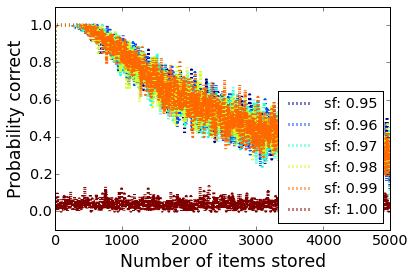

In [73]:
figure(figsize=(6,4))
cm=get_cmap('jet', li_mean.shape[1])

for i in range(li_mean.shape[1]):
    #plot(li_mean[:,i], color=cm(i))
    smoothN = 5
    plot(np.convolve(li_mean[:,i], np.ones(smoothN)/smoothN, mode='same'), 
         ':', color=cm(i), lw=3, label="sf: %0.2f" % test_sf[i])


M = np.arange(li_mean.shape[0])

#for idx_clip, clip in enumerate(test_clip):
#    p_correct = p_correct_l(M, N=N, D=len(random_idx.alphabet))
#    plot(M, p_correct, color=cm(idx_clip),lw=3, label="clip: %3d" % clip)


legend(loc='lower right');
#title('Readout of most recent input', fontsize=20);
xlabel('Number of items stored');
ylabel('Probability correct')
ylim([-0.1, 1.1])
savefig('figures/capacity_sf-N=' + str(N) +'-sf=' + str(len(test_sf)) + '-n' + time.strftime('%y%m%d') + '.png', format='png', transparent=True)
savefig('figures/capacity_sf-N='+ str(N) + '-sf=' + str(len(test_sf)) + '-n' + time.strftime('%y%m%d') + '.eps', format='eps', transparent=True)

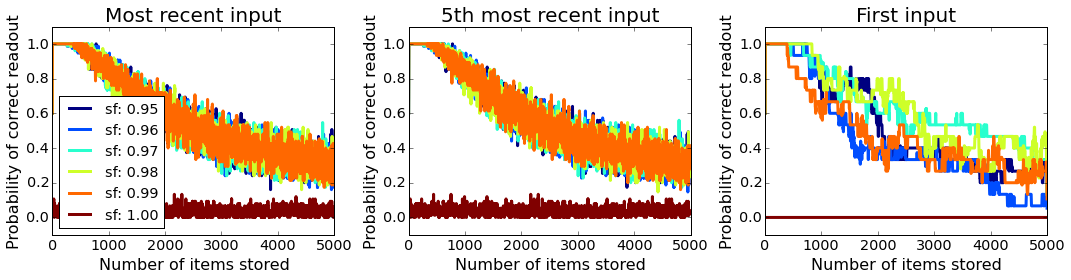

In [74]:
figure(figsize=(15,4))

subplot(131)
cm=get_cmap('jet', li_mean.shape[1])

for i in range(li_mean.shape[1]):
    #plot(li_mean[:,i], color=cm(i))
    smoothN = 5
    plot(np.convolve(li_mean[:,i], np.ones(smoothN)/smoothN, mode='same')[:-smoothN//2], 
         color=cm(i), lw=3, label="sf: %0.2f" % test_sf[i])
    
legend(loc='lower left');
title('Most recent input', fontsize=20);
xlabel('Number of items stored', fontsize=16);
ylabel('Probability of correct readout', fontsize=16)
ylim([-0.1, 1.1])

subplot(132)
cm=get_cmap('jet', iK_mean.shape[1])

for i in range(iK_mean.shape[1]):
    #plot(li_mean[:,i], color=cm(i))
    smoothN = 5
    plot(np.convolve(iK_mean[:,i], np.ones(smoothN)/smoothN, mode='same')[:-22],
         color=cm(i), lw=3, label="sf: %0.2f" % test_sf[i])
    
#legend(loc='lower left');
title('%dth most recent input' % K, fontsize=20);
xlabel('Number of items stored', fontsize=16);
ylabel('Probability of correct readout', fontsize=16)
ylim([-0.1, 1.1])

subplot(133)
cm=get_cmap('jet', li_mean.shape[1])

for i in range(fi_mean.shape[1]):
    #plot(li_mean[:,i], color=cm(i))
    smoothN = 5
    plot(np.convolve(fi_mean[:,i], np.ones(smoothN)/smoothN, mode='same'), 
         color=cm(i), lw=3, label="sf: %0.2f" % test_sf[i])
    
#legend(loc='lower left');
title('First input', fontsize=20);
xlabel('Number of items stored', fontsize=16);
ylabel('Probability of correct readout', fontsize=16)
ylim([-0.1, 1.1])
plt.tight_layout()

savefig('figures/capacity-sf-recency-n' + time.strftime('%y%m%d') + '.png', format='png', transparent=True)
savefig('figures/capacity-sf-recency-n' + time.strftime('%y%m%d') + '.eps', format='eps', transparent=True)

### Sparsity Derivation

We see that having sparsity essentially has no effect on the capacity of the hypervector, up until the point where there is a catastrophe when all of the +1, -1 are replaced by 0. 

The reason that the capacity isn't really effected is because the sum vector still retains its Gaussian (max entropy) statistics. This is the true thing that limits the information transmitted, and since every type of sparse vector leads to the Gaussian sum, then the total capacity is not different.

We can see that sparsity will effect both the signal and the noise equally, and essentially cancel out to lead to the same capacity result. 

$$
\mathcal{H}_{sf} := (X^{sf}_{\mu_\ell})^T \rho^{-\mu} (\Psi) =
(X^{sf}_{\mu_\ell}) ^T X^{sf}_{\mu_\ell} + \sum_{m \ne \mu}^M (X^{sf}_{\mu_\ell}) ^T \rho^{m-\mu} (X^{sf}_{m_\ell})
$$

So, we need to figure out the signal and noise. The signal is just the dot product of two sparse basis vectors. These will have $N*sf$ $+1$ or $-1$ aligned, which means the dot product will be $N*sf$. 

Now, we must consider the variance of two random sparse basis vectors. If the +1 or -1 is aligned with a 0 in the other sparse vector, then this will have no contribution to the variance. Therefore, only the aligned and non-zero elements will contribute to the variance. This means that each distractor contributes to the variance by $sf^2 N$. This the distribution is given by:

$$
\mathcal{H}_{sf} = N ( N sf, M N sf^2)
$$

From here it can easily be seen that the signal-to-noise ratio of these vectors will be constant, regardless of the sparseness factor:

$$
SNR = \frac{\mu}{\sigma} = \frac{N sf}{\sqrt{M N sf^2}} = \frac{N}{\sqrt{M N}}
$$